# Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

## Описание данных
### Данные для первой части
Файл /datasets/hypothesis.csv. 

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

### Данные для второй части
Файл /datasets/orders.csv

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# СТРУКТУРА РАБОТЫ

## Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача

Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

## Часть 2. Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задача

Проанализируйте A/B-тест:

Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте 
выводы и предположения.

Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

Сделайте выводы и предположения.

Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

Примите решение по результатам теста и объясните его. 

## 1. Предобработка данных

In [1]:
#импортируем библиотеки:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np
import datetime as dt

from scipy import stats as st
from datetime import datetime, timedelta
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
#установим отображение строчек без усечений:
pd.options.display.max_colwidth = 150

In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
#приведем колонки к нижнему регистру:
hypothesis.columns= hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В hypothesis представлено 9 гипотез по увеличению выручки интернет-магазина:

Reach — охват пользователей по 10-балльной шкале;
Impact — влияние на пользователей по 10-балльной шкале;
Confidence — уверенность в гипотезе по 10-балльной шкале;
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [8]:
#переименуем названия столбцов:
orders = orders.rename(columns = {'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [9]:
#проведем проверку на дубликаты:
orders.duplicated().sum()

0

In [10]:
#и на неявные дубликаты:
orders_dup = orders[orders.duplicated(subset=['visitor_id','group'])==True]
orders_dup

,transaction_id,visitor_id,date,revenue,group
91,3176574859,2742574263,2019-08-22,17868,B
95,372616894,457167155,2019-08-22,987,B
98,1962247337,2706377257,2019-08-01,7129,A
112,1638982251,3062433592,2019-08-01,8470,B
118,4233533907,2378935119,2019-08-22,3390,A
...,...,...,...,...,...
1172,3898641900,3803269165,2019-08-14,790,B
1175,1373388206,3717692402,2019-08-14,2400,B
1182,2682156369,1668030113,2019-08-14,1290,B
1189,4082620617,393266494,2019-08-14,31550,B


In [11]:
#приведем данные к нужному формату:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [14]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [15]:
#проведем проверку на дубликаты:
visitors.duplicated().sum()

0

In [16]:
#и на неявные дубликаты:
visitors_dup = visitors[visitors.duplicated(subset=['visitors','group'])==True]
visitors_dup

,date,group,visitors
58,2019-08-28,B,654


In [17]:
#приведем данные к нужному формату:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) 

В данном блоке были загружены 3 датасета, проведена проверка на дубликаты, переименованы столбцы, преобразованы типы данных.

## 2. Часть 1. Приоритизация гипотез.

Прежде чем переходить непосредственно к приоритизации, вследует вспомнить термины RICE и ICE. Собственно, обе этих аббревиатуры скрывают под собой методы, с помощью которых можно расставить приоритеты при выполнении задач. 

RICE - четыре фактора, из которых высчитывается оценка важности задачи:
R – Reach: охват. Это количество людей, которых коснется продукт. 
I – Impact: влияние. Это значение ценности обновления. 
C – Confidence: уверенность в оценке. Это процентное значение того, насколько вы убеждены в ценности продукта. 
E – Effort: трудозатраты. Это оценка того, сколько времени и сил уйдет на реализацию проекта. 

ICE расшифровывается следующим образом:

I – Impact: влияние. Насколько положительно нововведение повлияет на клиентов.
C – Confidence: уверенность. Насколько вы уверены в стратегии.
E – Easy: легкость. Насколько легко ввести стратегию в производство.

In [18]:
#посчитаем ICE для гипотез и отсортируем по убыванию ICE:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence']/hypothesis['efforts']
hypothesis.loc[:,['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Приоритетными являются гипотезы 8 (запустить акцию, дающую скидку на товар в день рождения), 0 (добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей), и 7 (добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок). 

In [19]:
#теперь посчитаем RICE для гипотез и отсортируем по убыванию RICE:
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
hypothesis.loc[:,['hypothesis','RICE']].sort_values(by=['RICE'], ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Приоритетными являются гипотезы 7 (добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок), 2 (добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа), 0 (добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей). 

Таким образом, в сумме приоритетными являются гипотезы 7 (добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок) и 0 (добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей).

Однако при определении приоритета гипотезы стоит учитывать не только влияние на пользователей, затраты и степень уверенности в самой гипотезе, но и число пользователей, которых она затронет. А т.к. гипотеза 7 затрагивает максимальное количество пользователей, то оставим ее.

## 3. Часть 2. Анализ A/B-теста

### Подготовка к анализу A/B-теста

In [20]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

In [21]:
#для начала посчитаем количество посетителей по группам и статистическую значимость:
print('Кол-во посетителей в группе А: {}\n'
      'Кол-во посетителей в группе B: {}'.format(visitors[visitors['group']=='A']['visitors'].sum(), 
                                                 visitors[visitors['group']=='B']['visitors'].sum()))
results = st.mannwhitneyu(visitors[visitors['group']=='A']['visitors'], visitors[visitors['group']=='B']['visitors'])
alpha = 0.05

if results.pvalue < alpha:
    print('Разница в количестве посетителей в группах A и B статистически значима')
else:
    print('Разница в количестве посетителей в группах A и B статистически не значима')

Кол-во посетителей в группе А: 18736
Кол-во посетителей в группе B: 18916
Разница в количестве посетителей в группах A и B статистически не значима


In [22]:
print('Количество покупок в группе A: {}'.format(len(orders[orders['group']=='A'])))
print('Количество покупок в группе B: {}'.format(len(orders[orders['group']=='B'])))

Количество покупок в группе A: 557
Количество покупок в группе B: 640


In [23]:
#также определим дату начала и конца исследования:
print(orders['date'].min())
print(orders['date'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00


In [24]:
#сгруппируем данные по пользователям и группам:
group_sizes = orders.groupby(['visitor_id', 'group']).size().reset_index()
group_sizes.columns = ['visitor_id', 'group', 'count']
group_sizes = group_sizes.query('count > 1').sort_values(by='visitor_id')
group_sizes

,visitor_id,group,count
45,199603092,A,4
58,237748145,A,4
63,249864742,B,3
94,366673373,A,2
104,393266494,B,2
...,...,...,...
1045,4109358064,A,2
1050,4134830387,B,2
1065,4186807279,B,2
1079,4256040402,A,7


In [25]:
#посмотрим, есть ли пользователи, которые попали в обе группы:
both_gr = []
for x in orders[orders['group']=='A']['visitor_id'].unique():
    if x in orders[orders['group']=='B']['visitor_id'].unique():        
        both_gr.append(x)
print('Повторы:', len(both_gr))
print('Пользователи в обеих группах:', both_gr)

Повторы: 58
Пользователи в обеих группах: [4069496402, 199603092, 3803269165, 2378935119, 237748145, 4256040402, 2038680547, 1738359350, 2458001652, 3891541246, 2716752286, 3656415546, 2686716486, 2954449915, 2927087541, 3234906277, 457167155, 2579882178, 3957174400, 1648269707, 2780786433, 818047933, 2044997962, 1959144690, 3202540741, 1333886533, 351125977, 3951559397, 393266494, 3984495233, 4120364173, 4266935830, 1230306981, 1294878855, 1614305549, 8300375, 477780734, 1668030113, 3717692402, 3766097110, 3941795274, 471551937, 1316129916, 1801183820, 1602967004, 2587333274, 2600415354, 232979603, 3972127743, 1404934699, 276558944, 3062433592, 2654030115, 3963646447, 4186807279, 2712142231, 2949041841, 963407295]


Получается, что 58 пользователей попали в обе группы. Удалим их.

In [26]:
orders = orders[~orders['visitor_id'].isin(both_gr)]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


In [27]:
orders.drop_duplicates()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


Итак, для исследования имеются две группы - А и В. Разница в количестве посетителей в группах статистически не значима. 
Период исследования: 31 день.

### Кумулятивная выручка

Построим график кумулятивной выручки по группам.

In [28]:
#для начала создадим массив уникальных пар значений дат и групп теста:
datesGroups = orders[['date', 'group']].drop_duplicates()

#затем соберем кумулятивные данные о заказах:
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[(orders['date'] <= x['date']) & (orders['group'] == x['group'])]
                        .agg({'date':'max', 'group':'max', 'transaction_id':pd.Series.nunique, 'visitor_id':pd.Series.nunique, 'revenue':'sum'}), axis=1)
                    .sort_values(by=['date','group']) 
                   )
display(ordersAggregated)

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


In [29]:
#далее соберем агрегированные кумулятивные по дням данные о посетителях:
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[(visitors['date'] <= x['date']) & (visitors['group'] == x['group'])]
                          .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                     )
display(visitorsAggregated)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [30]:
#еще стоит объединить полученные данные в одной таблице:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


In [31]:
#проведем проверку,совпадает ли минимальная дата в cumulativeData с минимальной датой в исходных данных:
cumulativeData['date'].min() == orders['date'].min() == visitors['date'].min()

True

In [32]:
#и максимальная:
cumulativeData['date'].max() == orders['date'].max() == visitors['date'].max()

True

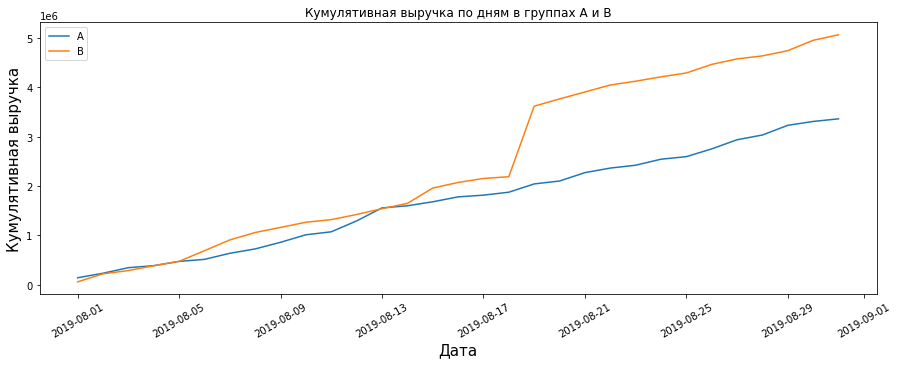

In [33]:
#построим собственно графики:
#используем датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date', 'revenue', 'orders']]

#и в группе B:
cumulativeRevenueB =cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'orders']]

plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по дням в группах А и В', fontsize=12)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Кумулятивная выручка', fontsize=15)
plt.xticks(rotation=30)
plt.legend() 
plt.show()

А/В-тест длился весь август 2019 г. Выручка увеличивается в течении всего теста. Однако график выручки группы В после 17 числа резко растет. Это может говорить о резком увеличении числа заказов или появлении дорогих заказов.

### График кумулятивного среднего чека по группам

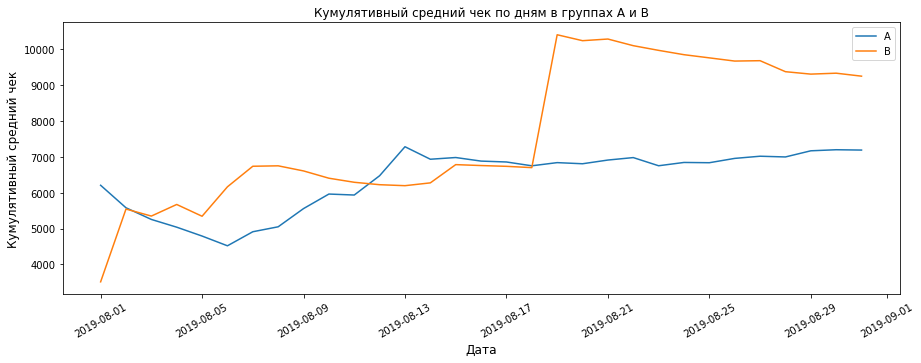

In [34]:
#построим график:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по дням в группах А и В', fontsize=12)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Кумулятивный средний чек', fontsize=12)
plt.xticks(rotation=30)
plt.legend() 
plt.show()

Средний чек группы А становится равномерным в середине теста, для группы B примерно 17-18 числа виден резкий скачок, а затем постепенное снижение. Возможно, в группу B попали крупные заказы.

### График относительного изменения кумулятивного среднего чека группы B к группе A

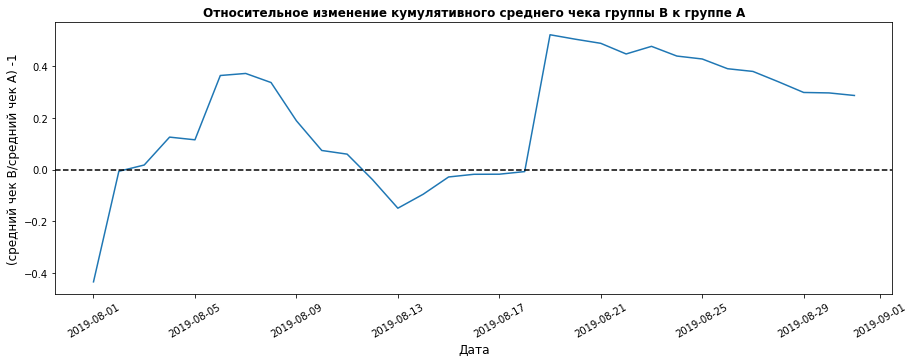

In [35]:
#соберем данные в одном датафрейме:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
#и поcтроим отношение средних чеков:
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A', fontsize=12, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('(средний чек В/средний чек А) -1', fontsize=12)
plt.xticks(rotation=30)
plt.show()

Судя по графику, за исследуемый период имело два пика, когда средний чек группы B значительно превосходил группу А, но быстро снижался после пика. 

### График кумулятивного среднего количества заказов на посетителя по группам

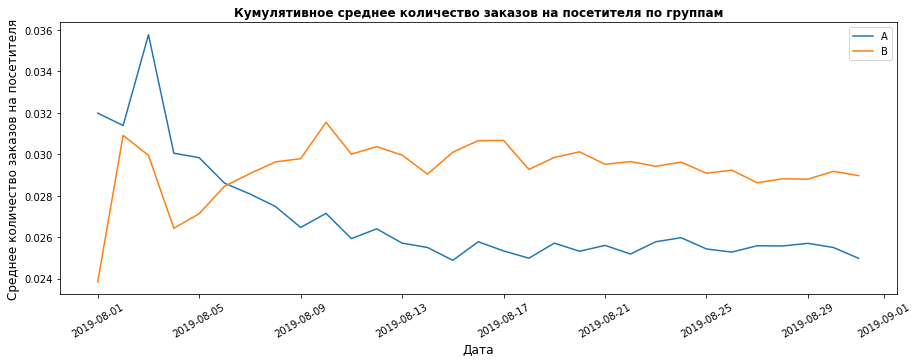

In [36]:
#будем строить график:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# Данные по группе A:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A'].reset_index(drop=True)

# Данные по группе B:
cumulativeDataB = cumulativeData[cumulativeData['group']=='B'].reset_index(drop=True)

plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Кумулятивное среднее количество заказов на посетителя по группам', fontsize=12, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Среднее количество заказов на посетителя', fontsize=12)
plt.xticks(rotation=30)
plt.show()

В начале сегмент А имел большее среднее количество заказов на посетителя, но потом сегмент В выровнялся и зафиксировался выше значения А.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

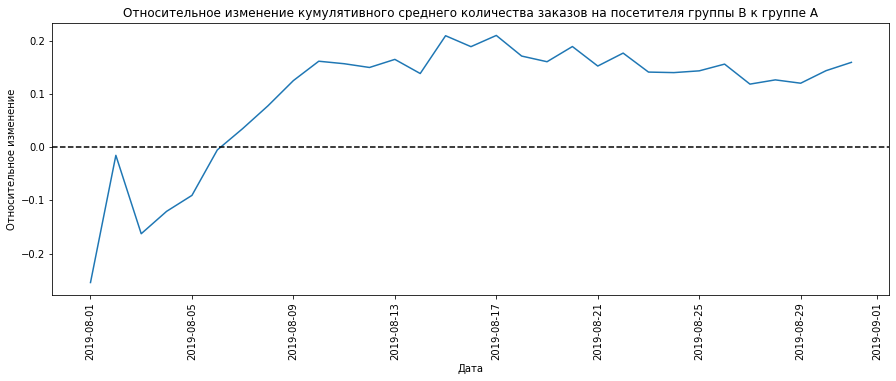

In [37]:
#соберем данные:
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataB['date'], (cumulativeDataB['conversion']/cumulativeDataA['conversion'])-1)

plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.xticks(rotation=90)
plt.show()

В самом начале наблюдаются колебания прироста, но почти с самого начала лидирует группа В.

### Точечный график количества заказов по пользователям

count    973.000000
mean       1.044193
std        0.238090
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: orders, dtype: float64

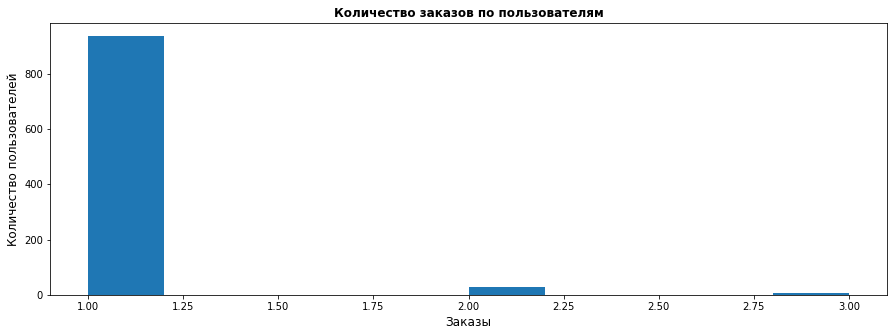

In [38]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsers.columns = ['visitor_id','orders']
#display(ordersByUsers.sort_values(by='orders',ascending=False).head(10)) 
display(ordersByUsers['orders'].describe())

plt.figure(figsize=(15,5))
plt.hist(ordersByUsers['orders']) 
plt.title('Количество заказов по пользователям', fontsize=12, fontweight='bold')
plt.xlabel('Заказы', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.show()

В основном у пользователей по 1, иногда по 2 заказа, больше - сильно реже.

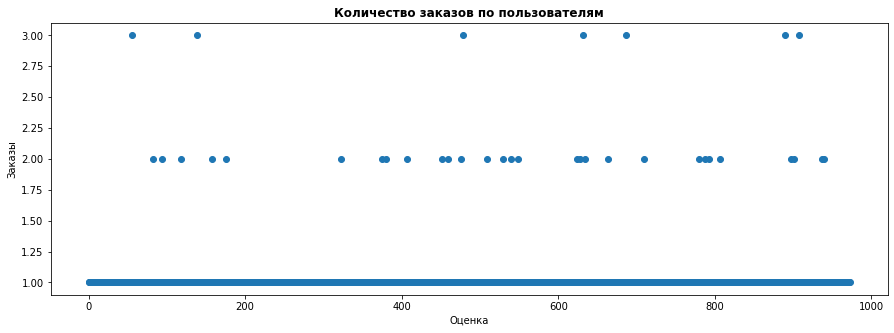

In [39]:
#построим точечную диаграмму числа заказов на одного пользователя:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.title('Количество заказов по пользователям', fontsize=12, fontweight='bold')
plt.xlabel('Оценка')
plt.ylabel('Заказы')
plt.scatter(x_values, ordersByUsers['orders']) 
plt.show()

В целом, все то же самое.

### Граница определения аномальных пользователей

In [40]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99])) 

[1. 1. 2.]


Определяем, что не более 5% пользователей совершили более 2 заказов и не более 1% больше 4 заказов.

### Точечный график стоимостей заказов

count    1.016000e+03
mean     8.300815e+03
std      4.212199e+04
min      5.000000e+01
25%      1.190000e+03
50%      2.955000e+03
75%      8.134250e+03
max      1.294500e+06
Name: revenue, dtype: float64

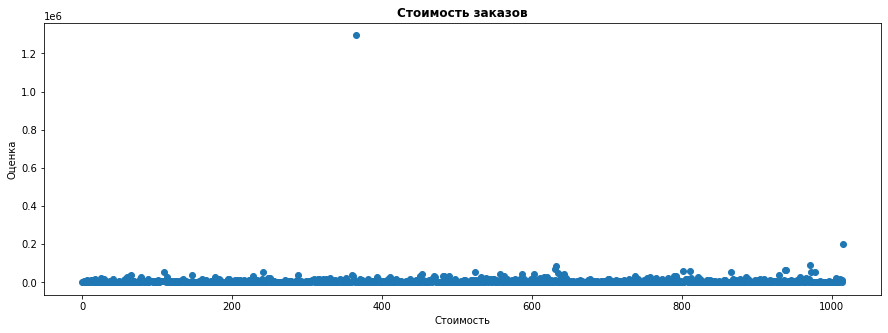

In [41]:
display(orders['revenue'].describe())

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders['revenue']) 
plt.title('Стоимость заказов', fontsize=12, fontweight='bold')
plt.xlabel('Стоимость')
plt.ylabel('Оценка')
plt.show()

Видны выбросы в районе 200 тыс. рублей и 1.2 млн рублей.

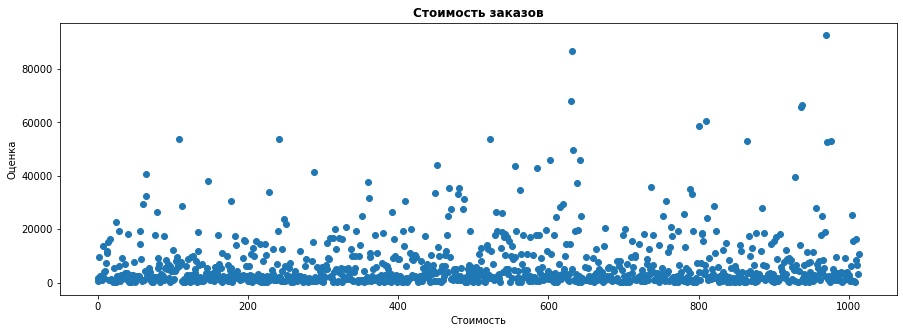

In [42]:
#построим более наглядный график, уберем выбросы:
x_values = pd.Series(range(0,len(orders[orders['revenue']<=200000]['revenue'])))
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders[orders['revenue']<=150000]['revenue']) 
plt.title('Стоимость заказов', fontsize=12, fontweight='bold')
plt.xlabel('Стоимость')
plt.ylabel('Оценка')
plt.show()

Согласно графику, большая часть покупок находится в пределах 30 тыс. рублей.

### 95-й и 99-й перцентили стоимости заказов

In [43]:
#посчитаем перцентили по стоимости:
np.percentile(orders['revenue'], [90, 95, 99])

array([17990., 26785., 53904.])

Не более 5% пользователей заказывают свыше 26785 рублей и не более 1% свыше 53904 рублей.
Логично взять пользователей, которые совершили не более 2 заказов и с чеками не более 27 тыс. рублей.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем нулевую и альтернативные гипотезы:

H0 - статистически значимых различий в среднем количестве заказов на посетителя между группами по "сырым" данным нет.

H1 - статистически значимые различия в среднем количестве заказов на посетителя между группами по "сырым" данным есть.

Критический уровень значимости равен 0.05.

Метод проверки гипотез - критерий Манна-Уитни, используемый для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно.

In [44]:
#создадим переменные ordersByUsersA и ordersByUsersB:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

In [45]:
#и переменные sampleA и sampleB:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)



print('p-value:', "{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительное изменение:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.01102
Относительное изменение: 0.160


Р-value = 0.01102, что значительно меньше 0.05. Следовательно, отвергаем нулевую гипотезу о том, что статистически значимых различий между группами нет, между группами есть разница. 
Относительный выигрыш группы B к группе А составляет 16%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем нулевую и альтернативные гипотезы:

H0 - статистически значимых различий в среднем чеке заказа между группами по "сырым" данным нет.

H1 - статистически значимые различия в среднем чеке заказа на посетителя между группами по "сырым" данным есть.

In [46]:
print('p-value:', '{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное изменение:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.829
Относительное изменение: 0.287


P-value больше 0.05. Следовательно не отвергаем нулевую гипотезу. Средний чек группы B выше среднего чека группы A на 28,7%.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [47]:
#для начала выделим из базы "аномальных" пользователей (совершивших более 2-го заказов или сумма заказа которых > 26785):

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
#по рекомендации изучим относительные и абсолютные потери:
relative_losses = abnormalUsers.shape[0]/orders['visitor_id'].nunique()
absolute_losses = abnormalUsers.shape[0]
print(abnormalUsers.head(5))
print()
print(f'Количество аномальных пользователей (абсолютные потери) составило {absolute_losses}, что соответствует {relative_losses:.2%} относительно общего числа пользователей (относительные потери)')

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitor_id, dtype: int64

Количество аномальных пользователей (абсолютные потери) составило 86, что соответствует 8.84% относительно общего числа пользователей (относительные потери)


Сформулируем нулевую и альтернативные гипотезы:

H0 - по "очищенным" данным статистически значимых различий в среднем количестве заказов на посетителя между группами нет.

H1 - по "очищенным" данным статистически значимые различия в среднем количестве заказов на посетителя между группами есть.

In [48]:
#изучим, как повлияли 86 "аномальных" пользователей на результаты теста:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group']=='B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('p-value:','{0:.5f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное изменение:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.01593
Относительное изменение: 0.174


По очищенным данным в среднем количестве заказов на посетителя между группами А и В по-прежнему есть статистически значимая разница. 
Относительный выигрыш группы В по сравнению с "сырыми" данными стал немного больше.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем нулевую и альтернативные гипотезы:

H0 - статистически значимых различий в среднем чеке пользователей между группами по "очищенным" данным нет.

H1 - статистически значимые различия в среднем чеке пользователей между группами по "очищенным" данным есть.

In [49]:
print('p-value:',
    '{0:.5f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительное изменение:',
    "{0:.5f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.72713
Относительное изменение: -0.03373


Р-value стал выше, по среднему чеку проигрыш группы В составляет 0.03373.

## Результат теста и принятие решения

Есть статистически значимые различия по среднему количеству заказов на посетителя между группами по «сырым», и по "очищенным" данным.
Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по "очищенным" данным.
Согласно среднему количеству заказов на посетителя между группам, результаты группы B лучше группы A, а также есть значительная тенденция к улучшению.
График различия среднего чека говорит о том, что результаты группы B лучше.

Принято решение остановить тест и зафиксировать победу группы В.